***Preface***

*Some of the text here has been taken from DataFest and the American Statistical Association.

DataFest was founded at UCLA in 2011, when 30 students gathered for 48 intense hours to analyze five years of arrest records provided by Lt. Thomas Zak of the Los Angeles Police Department. ASA DataFest is now sponsored by the American Statistical Association and hosted by several of the most prestigious colleges and universities in the country. More than 2000 students take part from schools such as UCLA, Pomona College, Cal Poly San Luis Obispo, UC Riverside, University of Southern California, Purdue University, Duke, the University of North Carolina, North Carolina State, Emory, Princeton, Dartmouth, Smith, Hampshire, Amherst, Mt. Holyoke, and the University of Massachusetts.

Elm City Stories is an educational video game designed for middle and high school students.  The game was developed for researchers at the Play2Prevent Lab within the Yale School of Medicine. The overall goal for the designers of the game is to prevent negative health outcomes such as HIV, sexually transmitted infections, and substance misuse in young at-risk teens (ages 11-14 years) by increasing their perception of risk and acquiring healthy skills to prevent engaging in risky behavior. A key component to this change is a set of skills that allow teens to      predict and understand future consequences of actions

***The Question***

The challenge in this DataFest is to help the researchers who created Elm City Stories to see if their game might be useful in understanding real-life behavior.  To do this, they're asking you to try to characterize, measure, observe, and display patterns of play within the game.  One goal for future games is to design them so that the games produce real-time data that is useful to psychology researchers. Your answers will help the Play2Prevent Lab researchers better understand what types of data this might be.

Unfortunately, we are unable to publish the dataset we were given at the request of the publishers.

***Introduction***

After playing through the game we quickly lost interest. We figured that if we did not have the patience to play through the game as college students, there's a good chance that many middle schoolers forced to play this game for money would likely not be interested either. Before spending a lot of time digging through the data, we wanted to ensure that our hypothesis would likely be correct by gauging other DataFest students whether they would have played through the game as a middle schooler as well, to which ~80% responded no. It would be hard to come to useful conclusions with this dataset given that many students probably are not "good" participants, creating a bit of sampling bias.

In [18]:
#importing relevant modules for future use
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns

In [19]:
# load the data
logs = pd.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/logs.csv')

/Users/wiggles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
#creates a list a dataframes, each representing a single player's full playthrough
df_players = []
for i in logs['player_id'].unique():
    df_players.append(logs[logs['player_id'] == i])

Within the first 10 minutes of the game, players are asked to pick words to describe their goals, themselves, their family, etc. Since this is an early part of the game, all players should reach this point and we suspect that the words they choose should be some indicator as to their initial interest in the game.

In [28]:
#creates a list of lists, with each list representing each players word choice
wordchoice = []
for i in df_players:
    wordchoice.append(i['old_label'] if pd.isna())

In [23]:
w = []
for i in wordchoice:
    w.append([x for x in i if pd.isna(x) == False ])

Here, we created a boolean mask in order to filter "good" responses from "bad" responses. Here we automatically filtered out players that had no input and players that had inputs as True and False. We also manually corrected some inputted values as "bad" because some players simply typed out innappropriate words or gibberish. This could be automatically filtered out using NLP in future iterations, but we decided against spending time to create such a model given the tight time constraints.

In [24]:
mask = []
for i in w:
    if len(i) == 0: #checks if responses even exist
        mask.append(False)
    else:
        mask.append(True)
trueIndices = []
for i in range(len(mask)):
    if mask[i]:
        trueIndices.append(i)

trueIndicesNonValid = [16, 29, 33, 42, 98, 100]
nonValid = []
for i in trueIndicesNonValid:
    nonValid.append(trueIndices[i])

# nonValid
for i in nonValid:
    mask[i] = not mask[i]

In [25]:
caregroup = []
notcaregroup = []
for i in range(len(mask)):
    if mask[i]:
        caregroup.append(df_players[i])
    else:
        notcaregroup.append(df_players[i])

In [26]:
caregroup_u16 = []
for i in range(len(caregroup)):
    if caregroup[i]['event_time_dbl'].max() <= 57600:
        caregroup_u16.append(caregroup[i])

notcaregroup_u16 = []
for i in range(len(notcaregroup)):
    if notcaregroup[i]['event_time_dbl'].max() <= 57600:
        notcaregroup_u16.append(notcaregroup[i])

NameError: name 'caregroup_hours_spent' is not defined

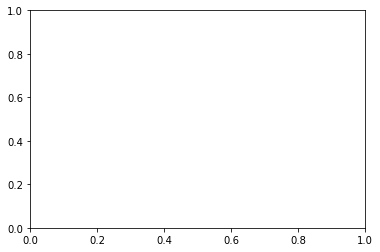

In [27]:
fig, ax = plt.subplots()
sns.histplot(x=caregroup_hours_spent, color = '#97d5bc')
sns.set(rc={'axes.facecolor':'#ffefe1', 'figure.facecolor':'#ffefe1', 'figure.figsize':(11.7,8.27)})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
ax.set_xlabel("Hours", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.set_title("Total time spent playing by group", fontsize = 20)
ax.grid = False

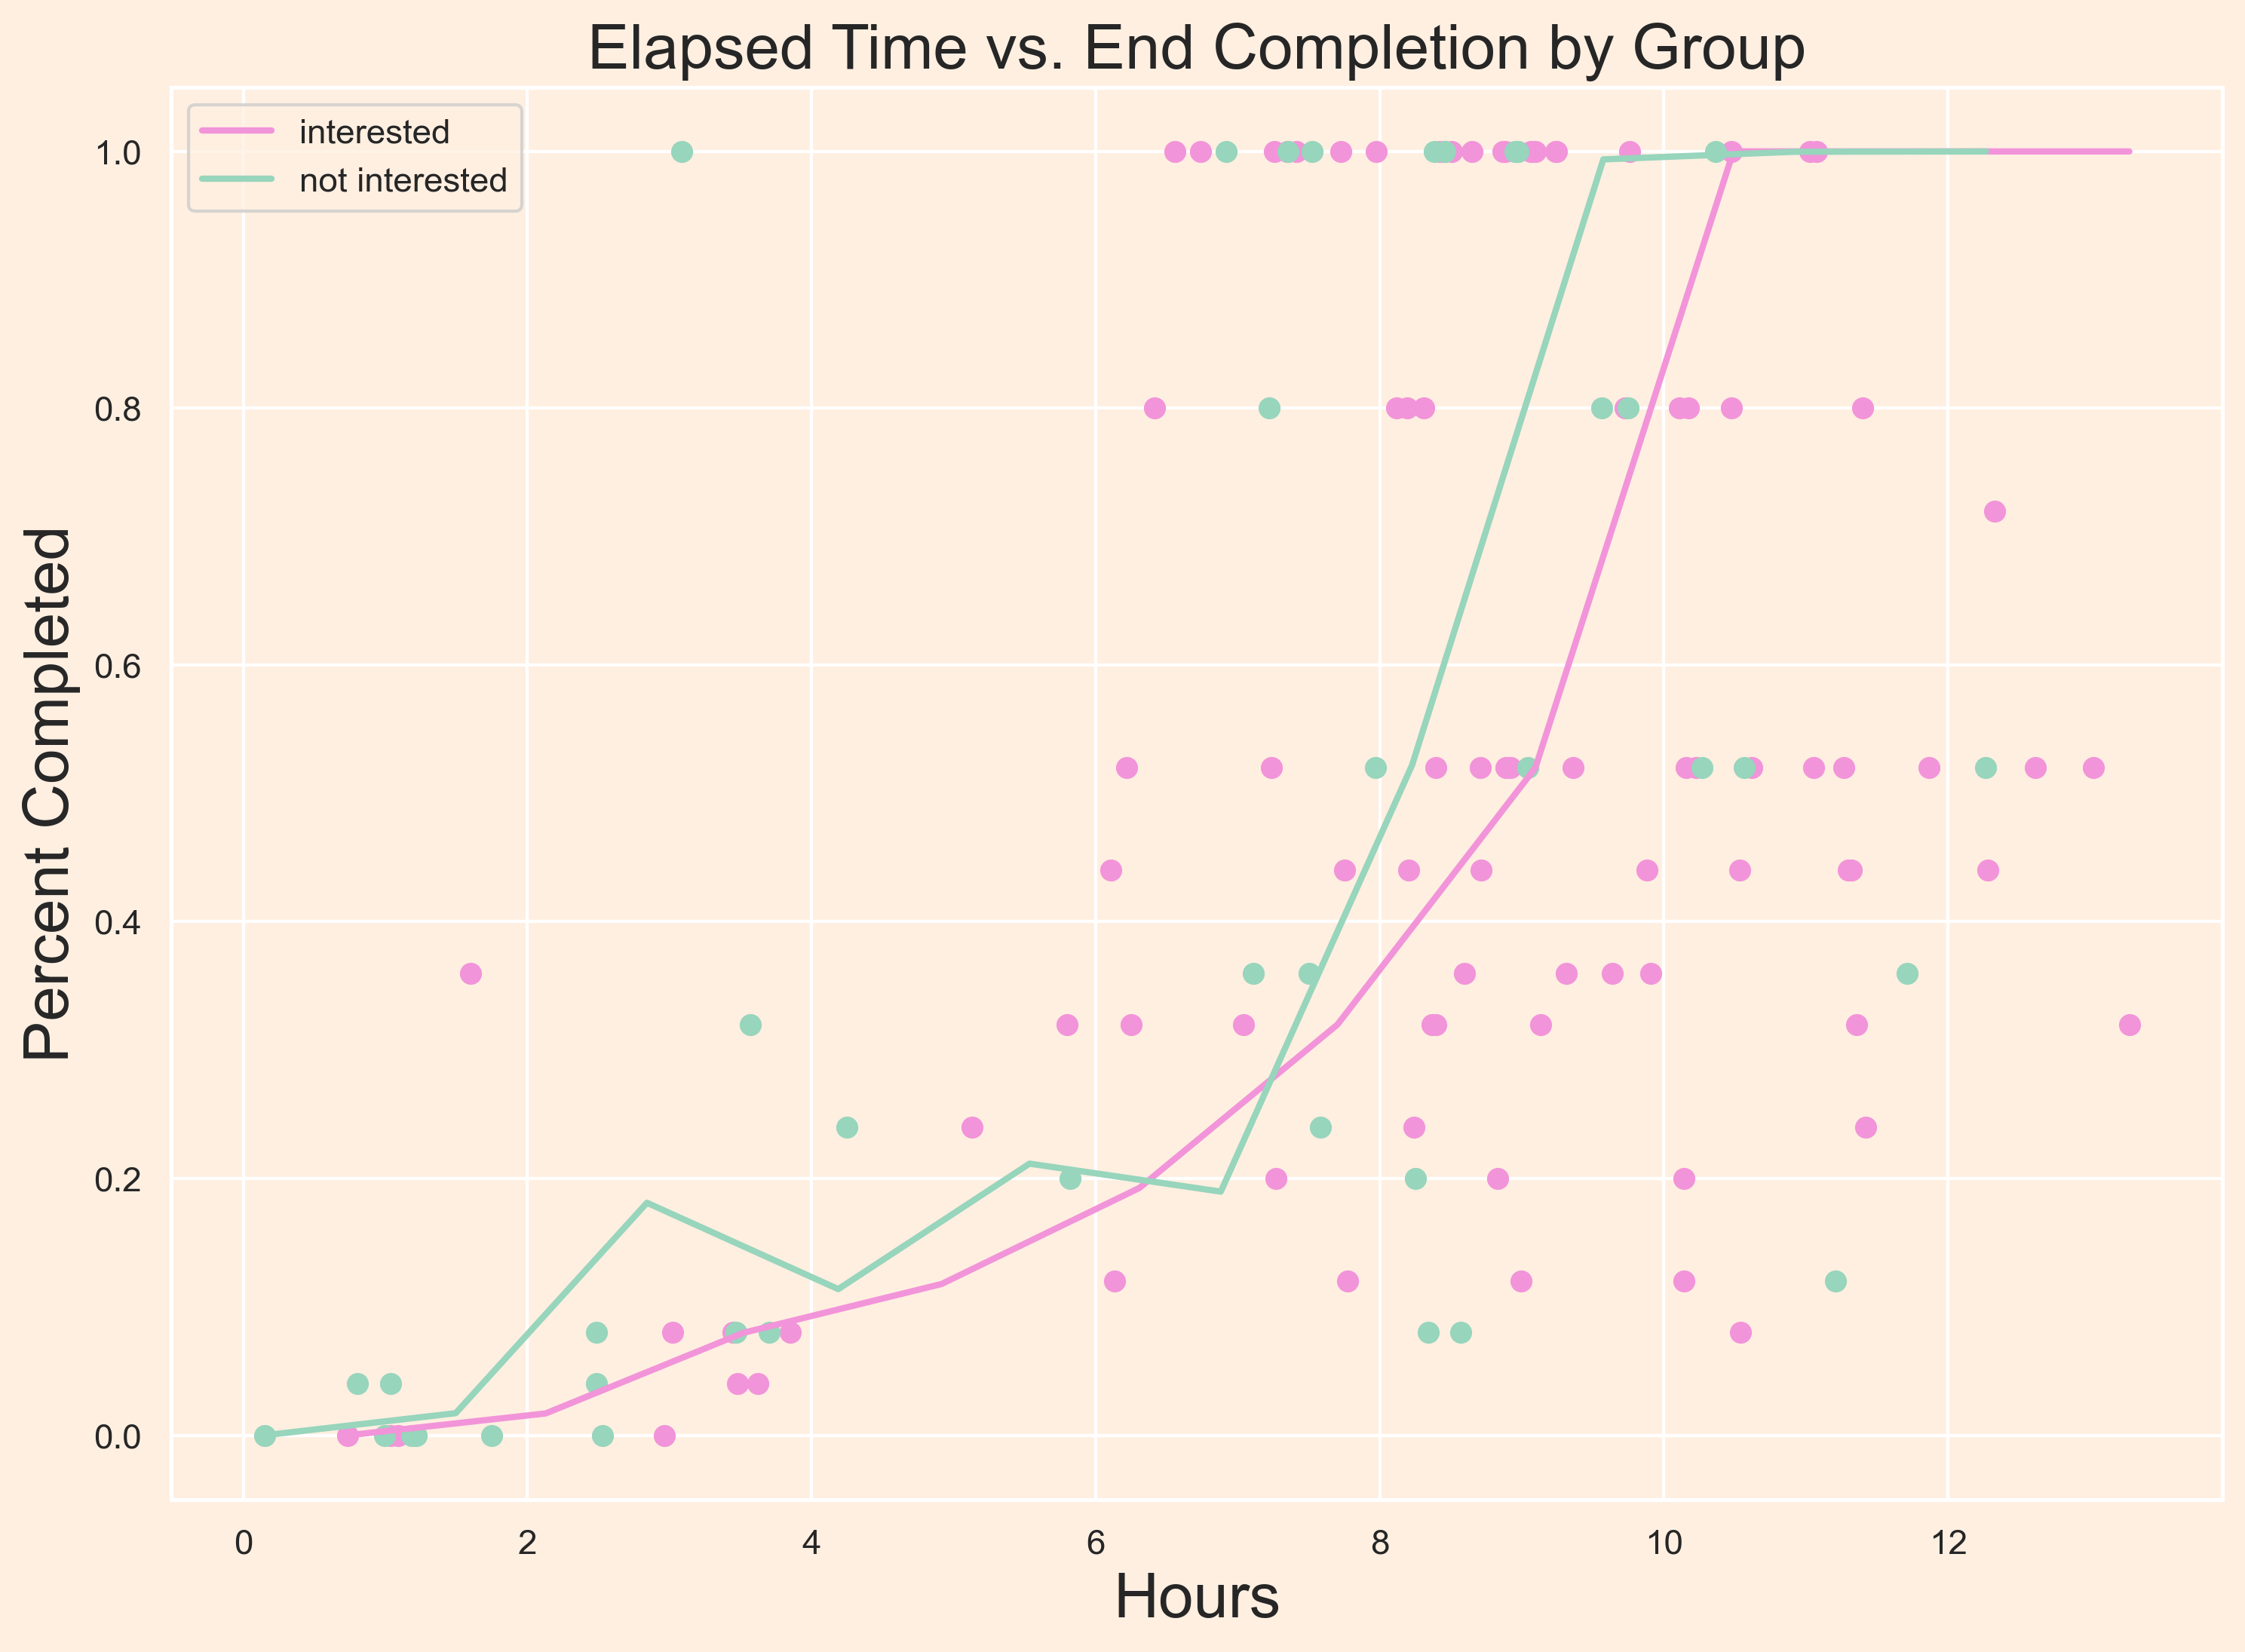

In [ ]:
from scipy.interpolate import make_interp_spline

X_Y_Spline_c = make_interp_spline(np.sort(caregroup_hours_spent), np.sort(caregroup_prop))

X_c = np.linspace(min(caregroup_hours_spent), max(caregroup_hours_spent), 10)
Y_c = X_Y_Spline_c(X_c)

X_Y_Spline_n = make_interp_spline(np.sort(notcaregroup_hours_spent), np.sort(notcaregroup_prop))

X_n = np.linspace(min(notcaregroup_hours_spent), max(notcaregroup_hours_spent), 10)
Y_n = X_Y_Spline_n(X_n)

fig, ax = plt.subplots()
ax.set_title("Total time spent playing by group", fontsize = 20)
ax.grid = False
plt.plot(X_c, Y_c, linewidth = 2, color = '#f294d9')
plt.plot(X_n, Y_n, linewidth = 2, color = '#97d5bc')
plt.scatter(caregroup_hours_spent, caregroup_prop, color = '#f294d9')
plt.scatter(notcaregroup_hours_spent, notcaregroup_prop, color = '#97d5bc')
plt.legend(['interested', 'not interested'], loc = "upper left")
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Percent Completed', fontsize = 20)
plt.title('Elapsed Time vs. End Completion by Group', fontsize = 20)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'axes.facecolor':'#ffefe1', 'figure.facecolor':'#ffefe1', 'figure.figsize':(11.7,8.27)})
plt.show()

In [ ]:
def prop(care_group): 
    prop = []
    for i in care_group:
        prop.append(i['proportion_complete'].max())
    return prop
caregroup_prop = prop(caregroup_u16)
notcaregroup_prop = prop(notcaregroup_u16)

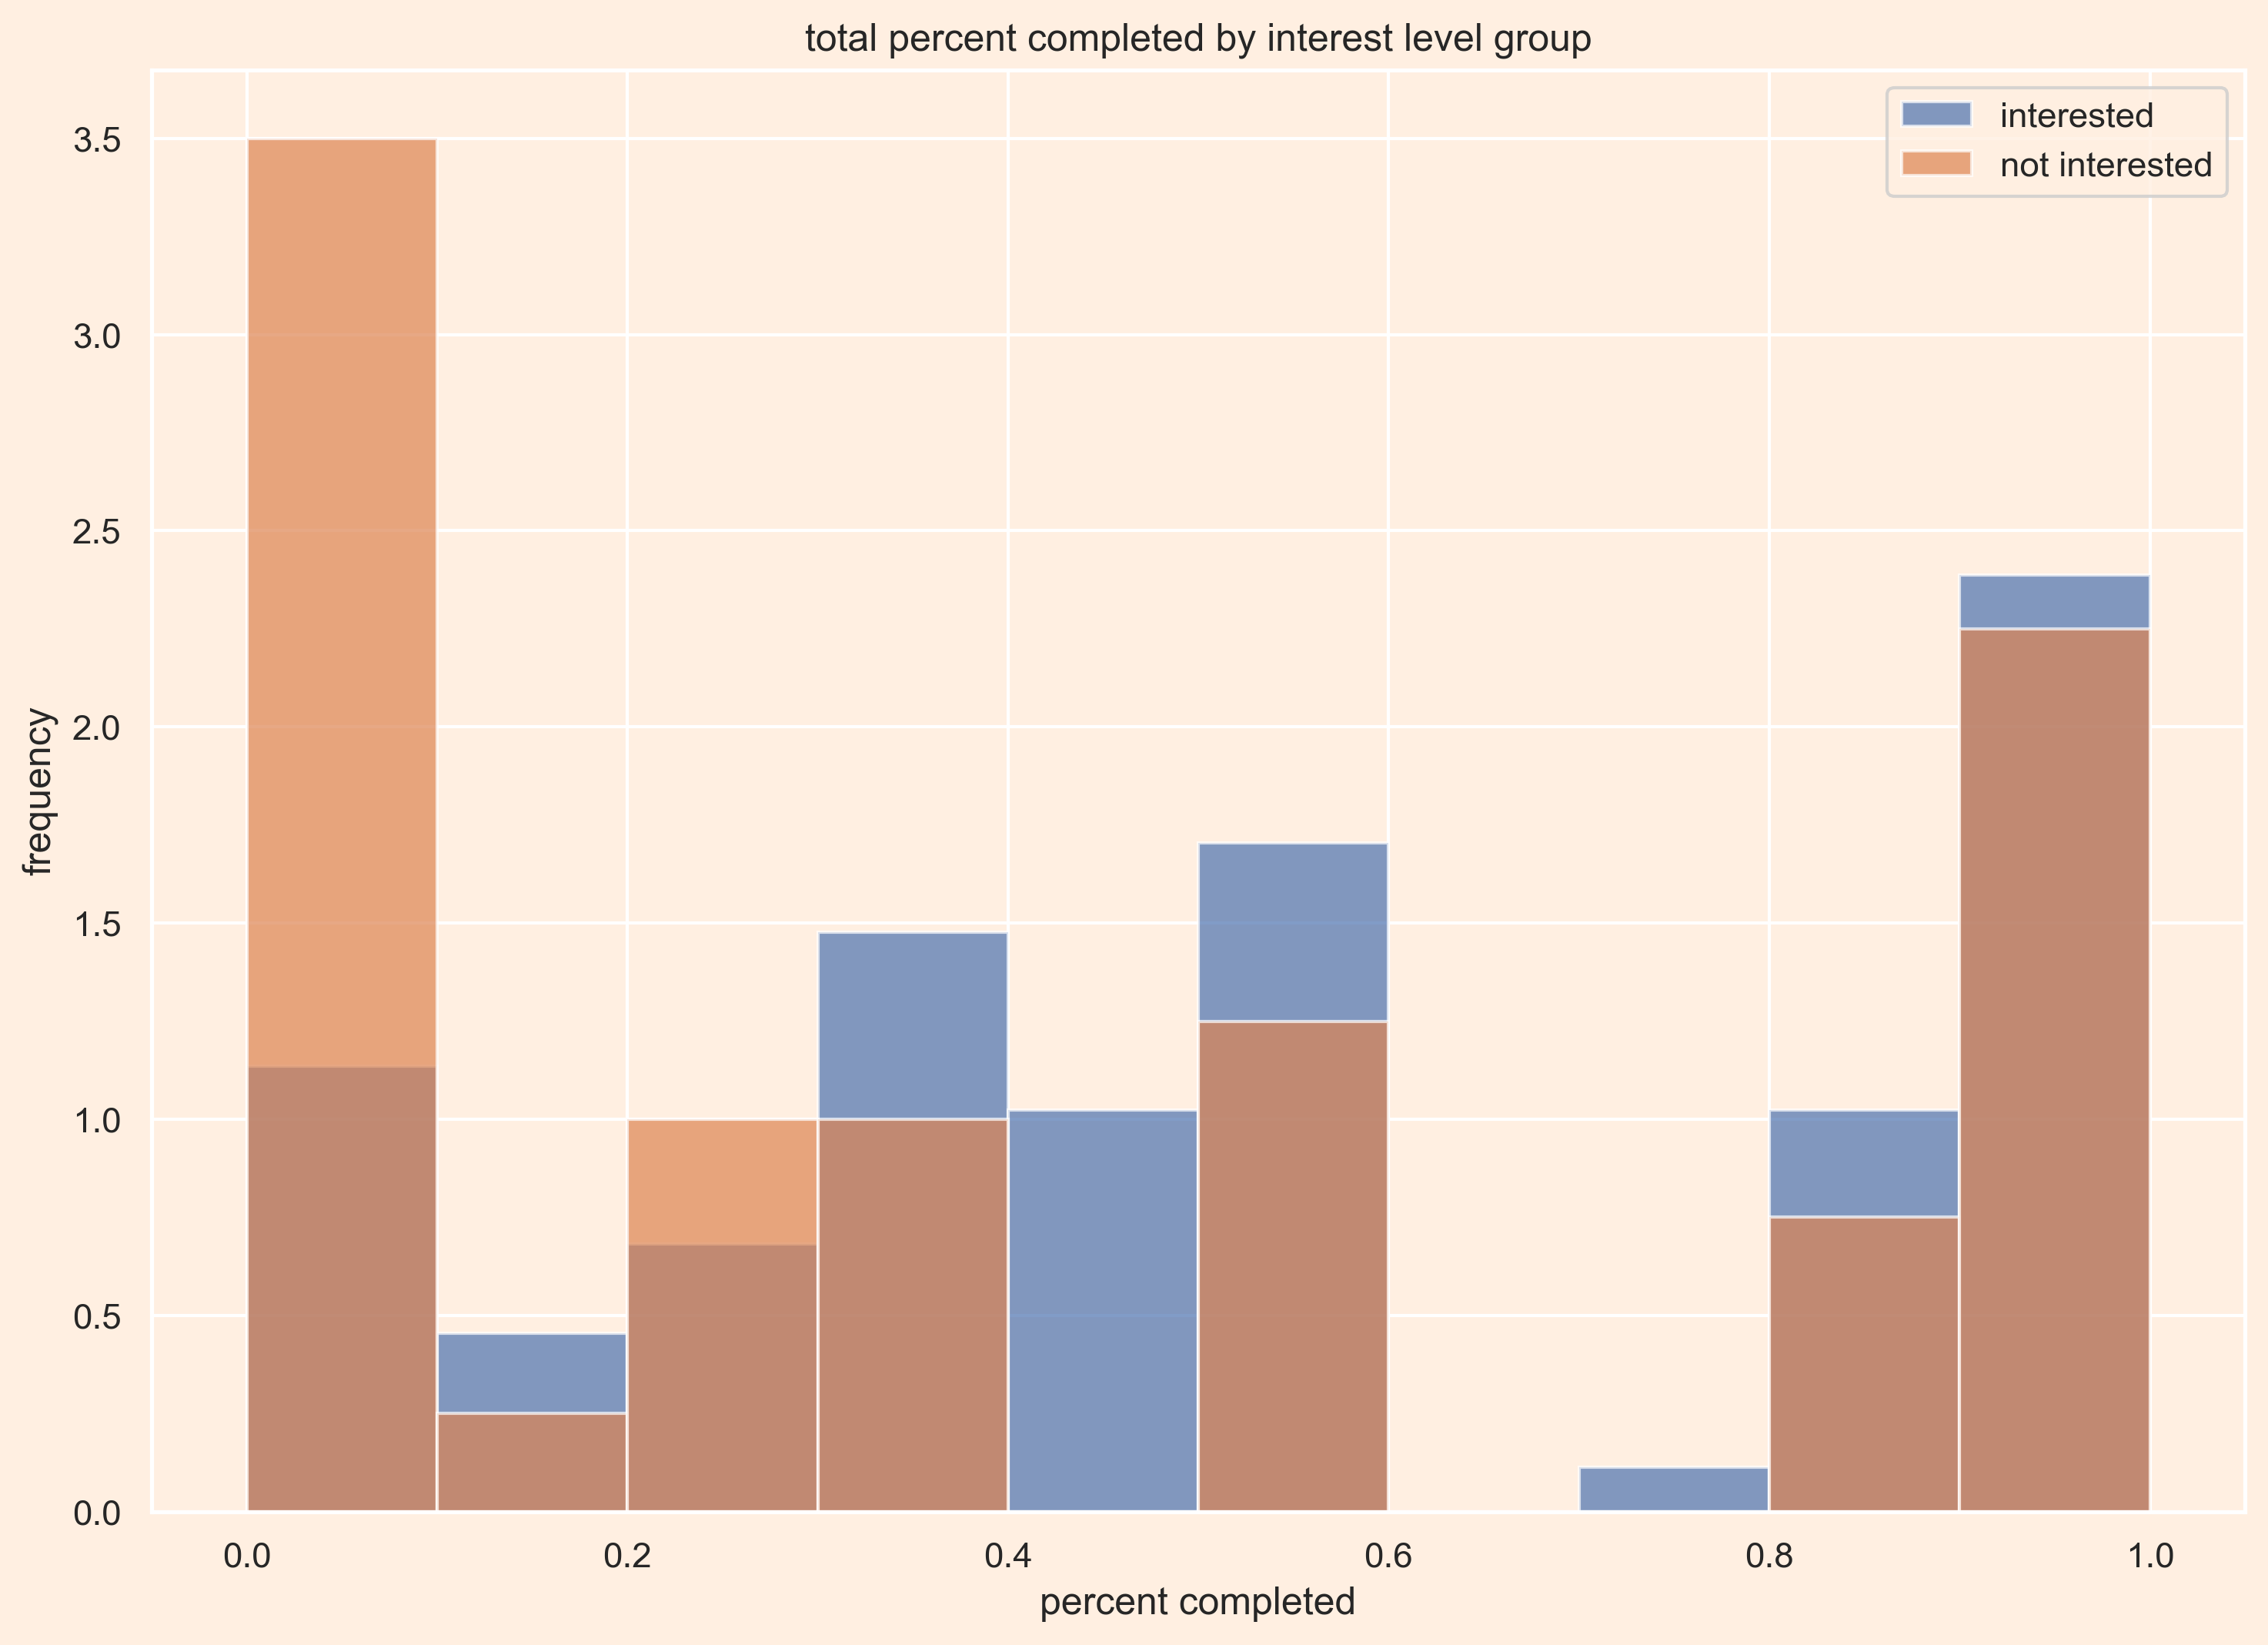

In [ ]:
plt.hist(caregroup_prop, density = True, bins = 10, alpha = 0.7)
plt.hist(notcaregroup_prop, density = True, bins = 10, alpha = 0.7)
plt.legend(['interested', 'not interested'])
plt.xlabel('percent completed')
plt.ylabel('frequency')
plt.title('total percent completed by interest level group')
plt.show()

In [ ]:
stats.ttest_ind(caregroup_hours_spent, notcaregroup_hours_spent, equal_var = False)

Ttest_indResult(statistic=3.2800487410039767, pvalue=0.0017180054292720468)

In [ ]:
stats.ttest_ind(caregroup_prop, notcaregroup_prop, equal_var = False)

Ttest_indResult(statistic=1.6095084730337983, pvalue=0.11227723530853016)

In [ ]:
z_care = np.polyfit(caregroup_prop, caregroup_hours_spent, 4)
f_care = np.poly1d(z_care)
x_care = np.linspace(0, 1, 100)
y_care = f_care(x)

z_notcare = np.polyfit(notcaregroup_prop, notcaregroup_hours_spent, 4)
f_notcare = np.poly1d(z_notcare)
x_notcare = np.linspace(0, 1, 100)
y_notcare = f_notcare(x)

plt.scatter(caregroup_prop, caregroup_hours_spent)
plt.plot(x_care, y_care, linewidth = 2)
plt.scatter(notcaregroup_prop, notcaregroup_hours_spent)
plt.plot(x_notcare, y_notcare, linewidth = 2)
plt.legend(['interested', 'not interested'], loc = "lower right")
plt.xlabel('percent completed')
plt.ylabel('hours')
plt.title('elapsed time vs. percent completed by interest level group')
plt.show()

NameError: name 'x' is not defined

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

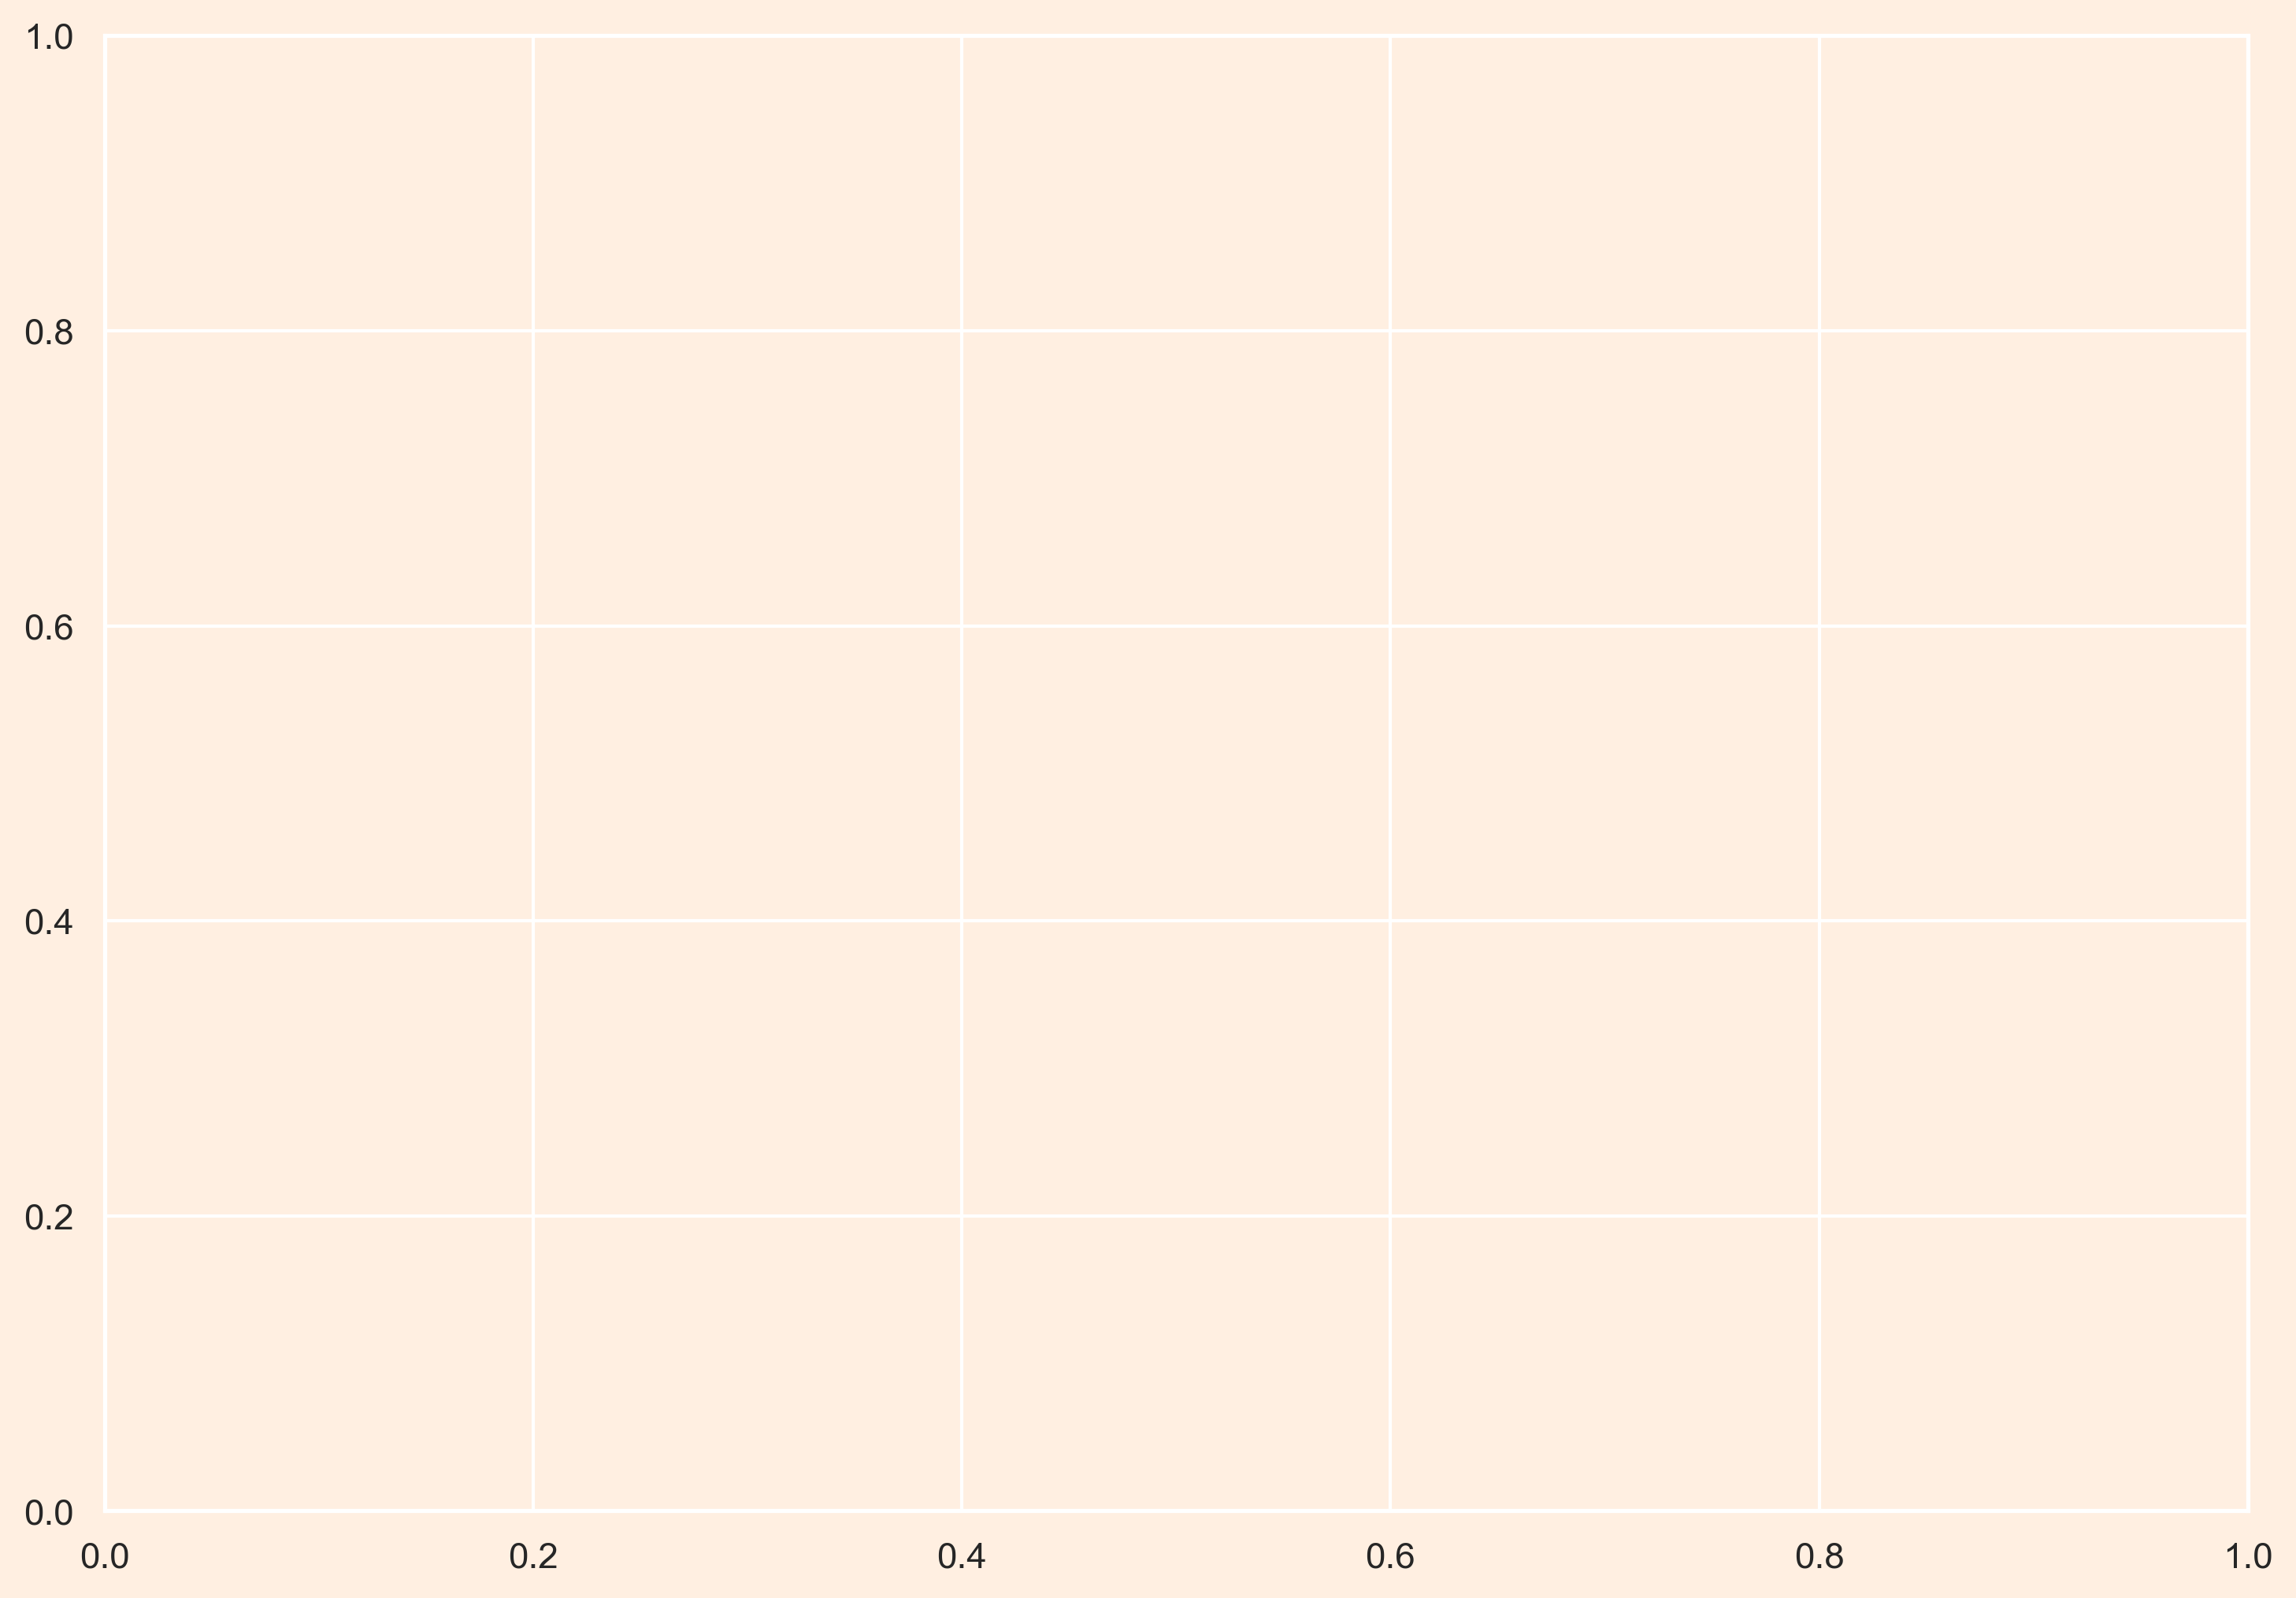

In [ ]:
still_care = {0:0, 0.05:0, 0.1:0, 0.15:0, 0.2:0, 0.25:0, 0.3:0, 0.35:0, 0.4:0, 0.45:0, 0.5:0,
              0.55:0, 0.6:0, 0.65:0, 0.70:0, 0.75:0, 0.80:0, 0.85:0, 0.90:0, 0.95:0, 1:0}
for status in caregroup_prop:
    for value in still_care:
        if status >= value: 
            still_care[value] += 1

still_notcare = {0:0, 0.05:0, 0.1:0, 0.15:0, 0.2:0, 0.25:0, 0.3:0, 0.35:0, 0.4:0, 0.45:0, 0.5:0,
              0.55:0, 0.6:0, 0.65:0, 0.70:0, 0.75:0, 0.80:0, 0.85:0, 0.90:0, 0.95:0, 1:0}
for status in notcaregroup_prop:
    for value in still_notcare:
        if status >= value: 
            still_notcare[value] += 1
            
plt.bar([still_care.keys(), still_care.keys()], [still_notcare.values(), still_notcare.values()])
plt.legend(['interested', 'not interested'], loc = "upper right")
plt.xlabel('percent completed')
plt.ylabel('count')
plt.xlim(0, 1)
plt.title('remaining players by interest level group')
plt.show()

print(still_care)
print(still_notcare)

In [ ]:
plt.scatterhist(notcaregroup_event_time, density = True,bins = 10, alpha = 0.7)
plt.legend(['interested', 'not interested'])
plt.xlabel('percent completed')
plt.ylabel('frequency')
plt.title('total percent completed by interest level group')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterhist'

ValueError: s must be a scalar, or float array-like with the same size as x and y

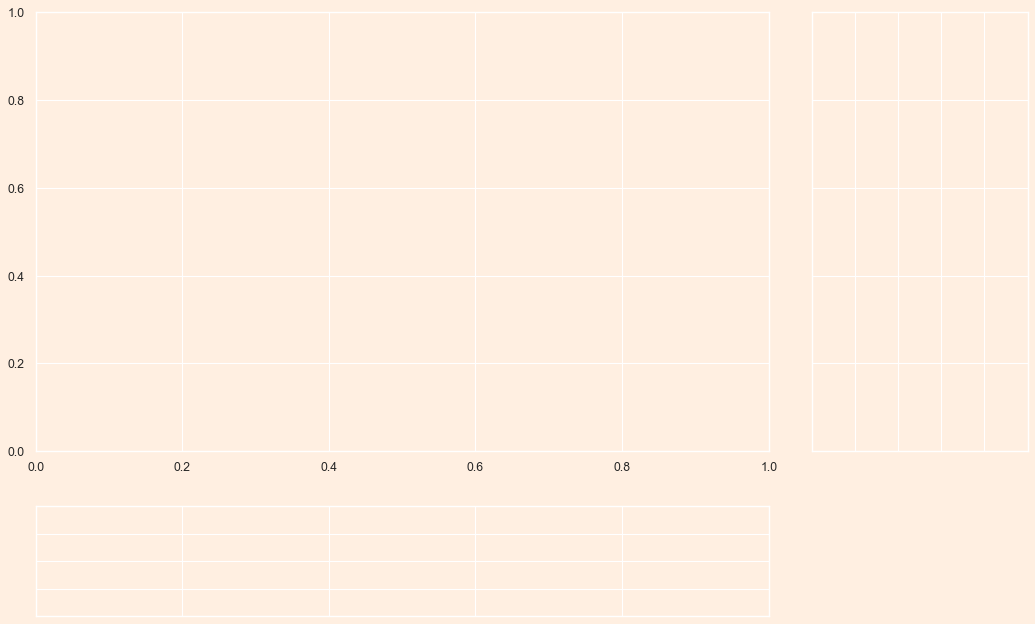

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=group_hours_spent, c=group_prop, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

P.S.

We won btw

# ![title](winner.jpg)